# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_current_value = btc_price['data']['1']['quotes']['USD']['price']
print(btc_current_value)


# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_current_value = eth_price['data']['1027']['quotes']['USD']['price']
print(eth_current_value, '\n')

# Compute current value of my crpto
my_btc_value = my_btc * btc_current_value
my_eth_value = my_eth * eth_current_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

27341.0
1777.93 

The current value of your 1.2 BTC is $32809.20
The current value of your 5.3 ETH is $9423.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')



# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-23", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
investments_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
agg_close = investments_df[investments_df['symbol']=="AGG"].drop('symbol', axis=1)
spy_close = investments_df[investments_df['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
combined_sb = pd.concat([agg_close, spy_close], axis='rows', join='inner')

# Preview DataFrame
combined_sb.head()

open    high     low   close     volume  \
timestamp                                                              
2023-03-23 04:00:00+00:00   99.68  100.05   99.51   99.99    9949714   
2023-03-23 04:00:00+00:00  395.09  399.29  390.35  393.17  119351319   

                           trade_count        vwap  
timestamp                                           
2023-03-23 04:00:00+00:00        36031   99.705660  
2023-03-23 04:00:00+00:00       871935  394.576872

In [21]:
# Pick AGG and SPY close prices
agg_close_price = float(agg_close['close'])
spy_close_price = float(spy_close['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.99
Current SPY closing price: $393.17


In [22]:
# Compute the current value of shares
# YOUR CODE HERE!
agg_value = agg_close_price * my_agg
spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19658.50
The current value of your 200 AGG shares is $19998.00


### Savings Health Analysis

In [60]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto_total = my_btc_value + my_eth_value
shares_total = spy_value + agg_value
investment_types = ['crypto', 'shares']
investment_totals = {'amount': [crypto_total, shares_total]}
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(investment_totals, index=investment_types)
# Display savings DataFrame
display(df_savings)

amount
crypto  42232.229
shares  39656.500

<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

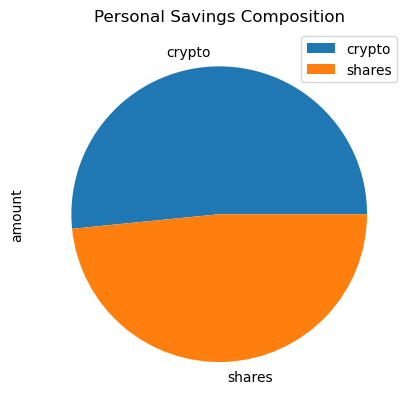

In [61]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', title='Personal Savings Composition')

In [67]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
saved = float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE!
if saved > emergency_fund:
    print("Congratulations, you have surpassed your financial goal!")
elif saved == emergency_fund:
    print("You have reached your goal.")
else:
    print(f"You are ${emergency_fund - saved} away from your goal.")

Congratulations, you have surpassed your financial goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [75]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-02-01', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])
# Display sample data
df_stock_data.head()
df_stock_data.tail()

SPY                                     \
                              open    high     low   close     volume   
timestamp                                                               
2023-01-26 05:00:00+00:00  403.130  404.92  400.03  404.75   72307597   
2023-01-27 05:00:00+00:00  403.655  408.16  403.44  405.68   68346180   
2023-01-30 05:00:00+00:00  402.800  405.13  400.28  400.59   74219199   
2023-01-31 05:00:00+00:00  401.130  406.53  400.77  406.48   86836885   
2023-02-01 05:00:00+00:00  405.211  413.67  402.35  410.80  101480517   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2023-01-26 05:00:00+00:00      521730  402.612043  100.33  100.4600  100.070   
2023-01-27 05:00:00+00:00      496480  405.790293   99.96  100.1400   99.910   
2023-01-30 05:00:00+00:00      515001  402.226146   99.90  100.0904   99.800   
2023-01-31 05:00:00+00:00      513130  404.159126  100.16  100.3400   99.825   
2023-02-01 05:00:00+00:00      833884  407.864239  100.19  100.7800   99.860   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-01-26 05:00:00+00:00  100.23   5399100       27372  100.278729  
2023-01-27 05:00:00+00:00  100.08   5123098       18192  100.061411  
2023-01-30 05:00:00+00:00   99.81   6822055       25027   99.892927  
2023-01-31 05:00:00+00:00  100.22  12083602       31978  100.037055  
2023-02-01 05:00:00+00:00  100.68  11593364       40470  100.349930

In [85]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
thirty_year_mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days=252 * 30
)

In [86]:
# Printing the simulation input data
# YOUR CODE HERE!
thirty_year_mc.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2018-02-01 05:00:00+00:00  281.08  283.06  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.23  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.85  263.31  264.11  298863447   
2018-02-06 05:00:00+00:00  259.94  269.70  258.70  269.06  354839027   
2018-02-07 05:00:00+00:00  268.50  272.36  267.58  267.67  169270734   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-02-01 05:00:00+00:00      304909  281.766220          NaN  107.75   
2018-02-02 05:00:00+00:00      548623  277.434737    -0.021904  107.25   
2018-02-05 05:00:00+00:00     1178563  269.869953    -0.041378  107.13   
2018-02-06 05:00:00+00:00     1527398  264.957106     0.018742  107.46   
2018-02-07 05:00:00+00:00      741997  269.593175    -0.005166  107.43   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2018-02-01 05:00:00+00:00  107.8250  107.48  107.52  10330443       26477   
2018-02-02 05:00:00+00:00  107.3450  107.10  107.20   4779312       17781   
2018-02-05 05:00:00+00:00  107.8100  107.00  107.63   5991756       26360   
2018-02-06 05:00:00+00:00  107.5600  107.28  107.32   6031378       24296   
2018-02-07 05:00:00+00:00  107.4369  107.00  107.08   4115631       17410   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-02-01 05:00:00+00:00  107.695566          NaN  
2018-02-02 05:00:00+00:00  107.197964    -0.002976  
2018-02-05 05:00:00+00:00  107.347994     0.004011  
2018-02-06 05:00:00+00:00  107.432203    -0.002880  
2018-02-07 05:00:00+00:00  107.186511    -0.002236

In [87]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
thirty_year_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.990411  0.999566  1.002839  1.003334  1.004027  0.999000  1.006161   
2     0.997339  0.982421  0.996586  1.010709  1.002859  0.987409  1.002475   
3     1.008525  0.983925  0.989706  1.018677  1.015778  0.985044  0.994348   
4     1.008630  1.006535  0.995623  1.011002  0.998682  0.974922  0.997113   
...        ...       ...       ...       ...       ...       ...       ...   
7556  2.926563  2.223597  1.947424  3.915301  3.361304  5.473805  6.808367   
7557  2.914343  2.216418  1.943126  3.928732  3.333933  5.534048  6.833434   
7558  2.926982  2.208052  1.917349  3.900118  3.301448  5.559742  6.907675   
7559  2.929009  2.187103  1.910586  3.921818  3.282241  5.504817  6.983218   
7560  2.904662  2.181492  1.908448  3.918000  3.295024  5.527006  7.065377   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997201  1.009472  0.985669  ...  1.006422  1.011294  1.011935   
2     1.002985  1.011517  0.976649  ...  0.994589  1.003627  1.007136   
3     1.019746  1.019225  0.985424  ...  0.986882  1.002970  0.997034   
4     1.039156  1.013968  0.972843  ...  0.985500  1.004217  1.014340   
...        ...       ...       ...  ...       ...       ...       ...   
7556  2.312917  5.488735  4.654302  ...  4.791550  6.097530  2.555699   
7557  2.314641  5.558683  4.620502  ...  4.814342  6.062129  2.574469   
7558  2.314605  5.567151  4.631317  ...  4.866175  6.007292  2.579157   
7559  2.297474  5.631141  4.625029  ...  4.911521  6.030258  2.529693   
7560  2.304448  5.564259  4.653091  ...  4.943899  6.054010  2.546451   

           493       494       495       496        497       498       499  
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1     1.002015  1.006396  0.997215  1.020956   0.980725  1.002226  1.007187  
2     1.010781  1.013094  0.997880  1.033428   0.978851  1.003393  1.025561  
3     1.012650  1.009157  0.983249  1.036226   0.974334  1.006461  1.018420  
4     0.994591  1.007646  0.998290  1.030792   0.969133  1.013216  1.006430  
...        ...       ...       ...       ...        ...       ...       ...  
7556  5.631224  4.623345  3.728662  5.501786  10.342341  1.316927  7.424381  
7557  5.613928  4.636323  3.704781  5.500851  10.304903  1.303302  7.526895  
7558  5.676931  4.643413  3.715866  5.547282  10.243196  1.284436  7.481665  
7559  5.668723  4.689600  3.734489  5.509280  10.300955  1.294631  7.483802  
7560  5.645324  4.651482  3.700636  5.487535  10.422874  1.295022  7.567866  

[7561 rows x 500 columns]

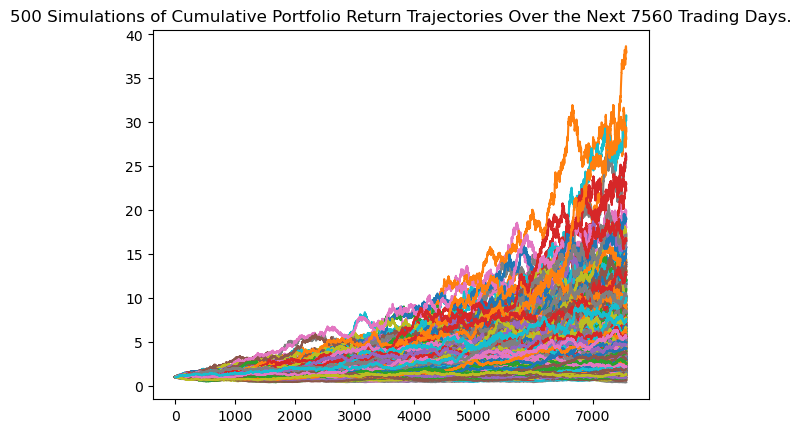

In [88]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_outcome = thirty_year_mc.plot_simulation()

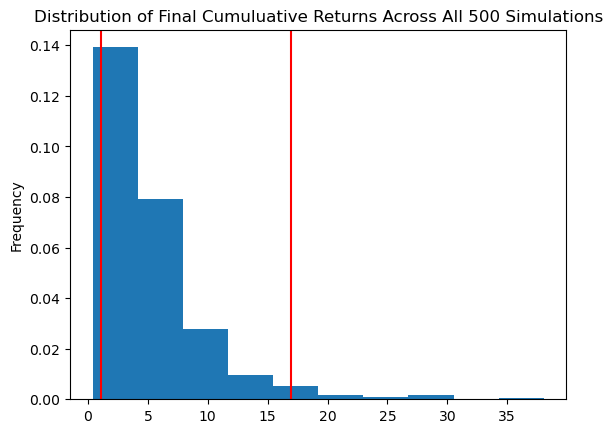

In [89]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_outcome = thirty_year_mc.plot_distribution()

### Retirement Analysis

In [93]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_summary = thirty_year_mc.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
mc_summary

C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              5.306992
std               4.514722
min               0.402777
25%               2.551897
50%               3.968479
75%               6.375664
max              38.050324
95% CI Lower      1.110228
95% CI Upper     16.935178
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
lower_ci = round(mc_summary[8] * initial_investment, 2)
upper_ci = round(mc_summary[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22204.56 and $338703.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [97]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lower_ci = round(mc_summary[8] * initial_investment, 2)
upper_ci = round(mc_summary[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33306.85 and $508055.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_early_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [99]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_early_retirement.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2018-02-01 05:00:00+00:00  281.08  283.06  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.23  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.85  263.31  264.11  298863447   
2018-02-06 05:00:00+00:00  259.94  269.70  258.70  269.06  354839027   
2018-02-07 05:00:00+00:00  268.50  272.36  267.58  267.67  169270734   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-02-01 05:00:00+00:00      304909  281.766220          NaN  107.75   
2018-02-02 05:00:00+00:00      548623  277.434737    -0.021904  107.25   
2018-02-05 05:00:00+00:00     1178563  269.869953    -0.041378  107.13   
2018-02-06 05:00:00+00:00     1527398  264.957106     0.018742  107.46   
2018-02-07 05:00:00+00:00      741997  269.593175    -0.005166  107.43   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2018-02-01 05:00:00+00:00  107.8250  107.48  107.52  10330443       26477   
2018-02-02 05:00:00+00:00  107.3450  107.10  107.20   4779312       17781   
2018-02-05 05:00:00+00:00  107.8100  107.00  107.63   5991756       26360   
2018-02-06 05:00:00+00:00  107.5600  107.28  107.32   6031378       24296   
2018-02-07 05:00:00+00:00  107.4369  107.00  107.08   4115631       17410   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-02-01 05:00:00+00:00  107.695566          NaN  
2018-02-02 05:00:00+00:00  107.197964    -0.002976  
2018-02-05 05:00:00+00:00  107.347994     0.004011  
2018-02-06 05:00:00+00:00  107.432203    -0.002880  
2018-02-07 05:00:00+00:00  107.186511    -0.002236

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

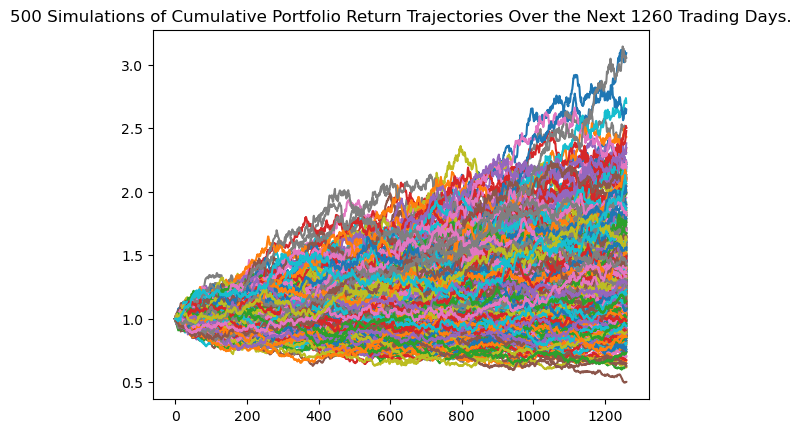

In [101]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation = MC_early_retirement.plot_simulation()

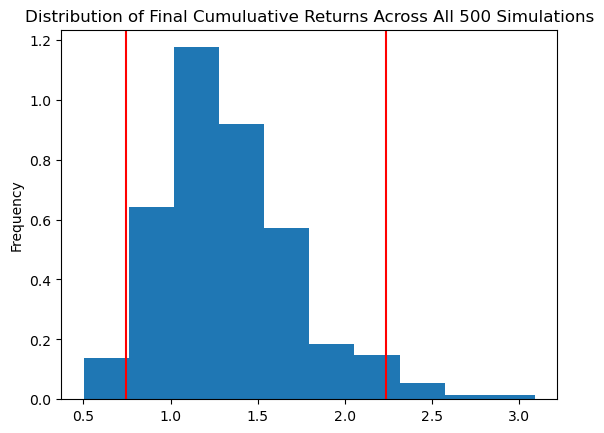

In [102]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution =  MC_early_retirement.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_sim =  MC_early_retirement.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
mc_sim

C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.335331
std               0.389594
min               0.503386
25%               1.073215
50%               1.275057
75%               1.543789
max               3.089753
95% CI Lower      0.743569
95% CI Upper      2.234305
Name: 1260, dtype: float64

In [112]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 90000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(mc_sim[8]*initial_investment,2)
ci_upper_five = round(mc_sim[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 5 years will end within in the range of $66921.19 and $201087.42


### Ten Years Retirement Option

In [113]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.7,.3],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [114]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2018-02-01 05:00:00+00:00  281.08  283.06  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.23  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.85  263.31  264.11  298863447   
2018-02-06 05:00:00+00:00  259.94  269.70  258.70  269.06  354839027   
2018-02-07 05:00:00+00:00  268.50  272.36  267.58  267.67  169270734   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-02-01 05:00:00+00:00      304909  281.766220          NaN  107.75   
2018-02-02 05:00:00+00:00      548623  277.434737    -0.021904  107.25   
2018-02-05 05:00:00+00:00     1178563  269.869953    -0.041378  107.13   
2018-02-06 05:00:00+00:00     1527398  264.957106     0.018742  107.46   
2018-02-07 05:00:00+00:00      741997  269.593175    -0.005166  107.43   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2018-02-01 05:00:00+00:00  107.8250  107.48  107.52  10330443       26477   
2018-02-02 05:00:00+00:00  107.3450  107.10  107.20   4779312       17781   
2018-02-05 05:00:00+00:00  107.8100  107.00  107.63   5991756       26360   
2018-02-06 05:00:00+00:00  107.5600  107.28  107.32   6031378       24296   
2018-02-07 05:00:00+00:00  107.4369  107.00  107.08   4115631       17410   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-02-01 05:00:00+00:00  107.695566          NaN  
2018-02-02 05:00:00+00:00  107.197964    -0.002976  
2018-02-05 05:00:00+00:00  107.347994     0.004011  
2018-02-06 05:00:00+00:00  107.432203    -0.002880  
2018-02-07 05:00:00+00:00  107.186511    -0.002236

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

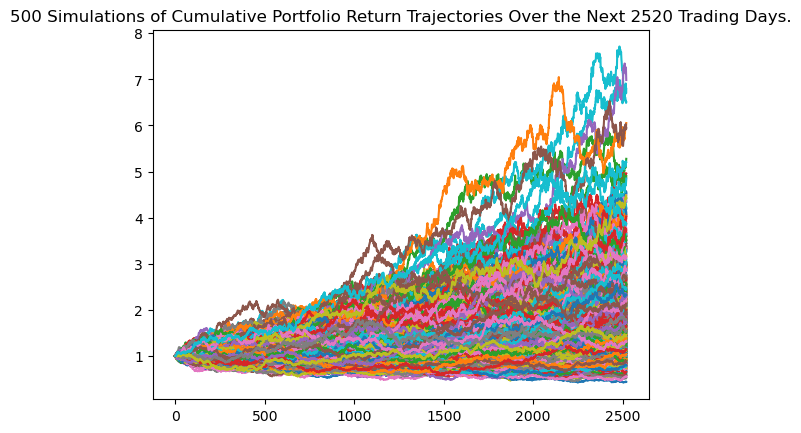

In [115]:
# Plot simulation outcomes
# YOUR CODE HERE!
ten_year = MC_ten_year.plot_simulation()

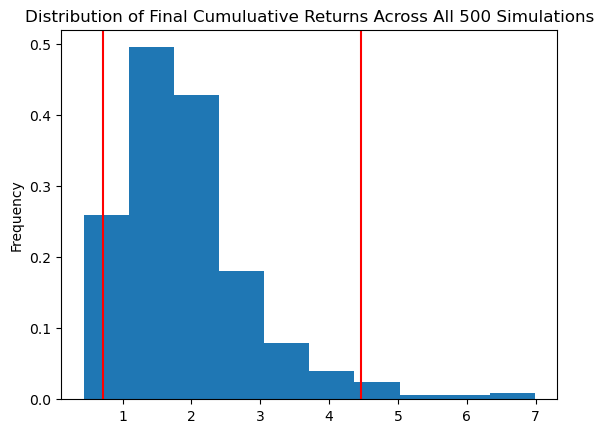

In [116]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ten_year_dist = MC_ten_year.plot_distribution()

In [117]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_year_sum = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
ten_year_sum

C:\Users\dvann\FINTECH\Financial Planning-Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.937701
std               0.995237
min               0.438729
25%               1.243668
50%               1.755402
75%               2.355604
max               6.986330
95% CI Lower      0.713992
95% CI Upper      4.461900
Name: 2520, dtype: float64

In [121]:
# Set initial investment
# YOUR CODE HERE!
initial_10_year = 90000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(ten_year_sum[8]*initial_10_year,2)
ci_upper_ten = round(ten_year_sum[9]*initial_10_year,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 10 years will end within in the range of $64259.24 and $401570.98


In [ ]:
Early retirement is possible, reward resides in risk. 